# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [0]:
from scipy import stats
dir(stats)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_multivariate',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'crystalball',
 'cumfreq',
 'describe',
 'dgamma',
 'dirichlet',
 'distributions',
 'division',
 'dlaplace',
 'dweibull',
 'energy_dist

In [0]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [0]:
# And a new friend - t
t1 = stats.t(5)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.2909944487358056
1.6666666666666667


![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [0]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test.

In [0]:
survey_data = [0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
 1, 0, 1, 0, 1, 1, 0, 0, 0]

import numpy as np
import pandas as pd

df = pd.DataFrame(survey_data)

df.describe()

,0
count,50.000000
mean,0.660000
std,0.478518
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


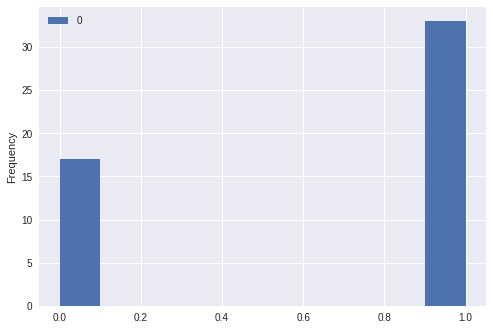

In [0]:
df.plot.hist()

In [0]:
import scipy
scipy.stats.ttest_1samp(survey_data, 0.5)

Ttest_1sampResult(statistic=2.364321853156195, pvalue=0.02207003200903075)

In [0]:
df[0].mean()

0.66

In [0]:
# manual calc of t stat
(df[0].mean() - 0.5) / df.std() * 50**(0.5)

0    2.364322
dtype: float64

In [0]:
# science! reproducibility
import random

def make_soda_data(n=50):
  return pd.DataFrame([random.randint(0,1) for _ in range(n)])

make_soda_data().describe()

,0
count,50.000000
mean,0.620000
std,0.490314
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [0]:
t_statistics = []
n_experiments = 10000

for _ in range(n_experiments):
  t_statistics.append(scipy.stats.ttest_1samp(make_soda_data(), 0.5).statistic[0])
  
stats = pd.DataFrame(t_statistics)
stats.describe()

,0
count,10000.000000
mean,-0.009832
std,1.014668
min,-5.250000
25%,-0.561801
50%,0.000000
75%,0.561801
max,4.261465


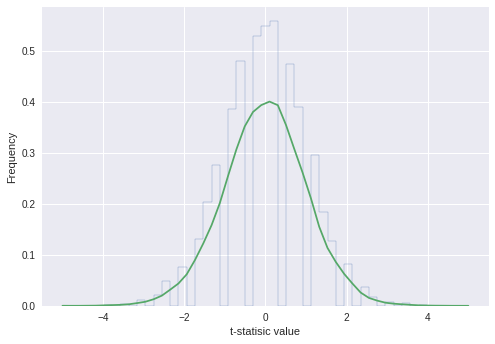

In [0]:
import matplotlib.pyplot as plt

def plot_t_stat_density(t_statistics):
  density = scipy.stats.gaussian_kde(t_statistics)
  n, x, _ = plt.hist(t_statistics, bins=np.linspace(-5, 5, 50), 
                     histtype=u'step', normed=True)  
  plt.plot(x, density(x))
  plt.xlabel('t-statisic value')
  plt.ylabel('Frequency')
  plt.show()
  
plot_t_stat_density(t_statistics)

In [0]:
# unfair coin
t_statistics_bias = []
n_experiments = 10000

def make_soda_data_bias(n=50):
  return pd.DataFrame([np.random.binomial(n=1, p=0.6) for _ in range(n)])

for _ in range(n_experiments):
  t_statistics_bias.append(scipy.stats.ttest_1samp(make_soda_data_bias(), 0.5).statistic[0])
  
stats = pd.DataFrame(t_statistics_bias)
stats.describe()


,0
count,10000.000000
mean,1.465665
std,1.071861
min,-2.041667
25%,0.846114
50%,1.428869
75%,2.041667
max,6.491982


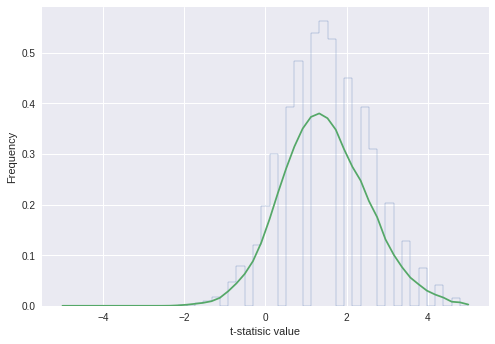

In [0]:
plot_t_stat_density(t_statistics_bias)

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
# load data and imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
names_poli = ['party',
         'handicapped-infants',
         'water-project-cost-sharing',
         'adoption-of-the-budget-resolution',
         'physician-fee-freeze',
         'el-salvador-aid',
         'religious-groups-in-schools',
         'anti-satellite-test-ban',
         'aid-to-nicaraguan-contras',
         'mx-missile',
         'immigration',
         'synfuels-corporation-cutback',
         'education-spending',
         'superfund-right-to-sue',
         'crime',
         'duty-free-exports',
         'export-administration-act-south-africa']

df_poli_raw = pd.read_csv(data_url, header=None, names=names_poli)
df_poli_raw.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
# examining null values

# first, map all question marks to np.nan
df_poli_raw.replace('?', np.nan, inplace=True)

# count nulls
df_poli_raw.isnull().sum()

party                                       0
handicapped-infants                        12
water-project-cost-sharing                 48
adoption-of-the-budget-resolution          11
physician-fee-freeze                       11
el-salvador-aid                            15
religious-groups-in-schools                11
anti-satellite-test-ban                    14
aid-to-nicaraguan-contras                  15
mx-missile                                 22
immigration                                 7
synfuels-corporation-cutback               21
education-spending                         31
superfund-right-to-sue                     25
crime                                      17
duty-free-exports                          28
export-administration-act-south-africa    104
dtype: int64

In [0]:
df_poli_raw.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


For handling Nulls, note the relevant information in the data description:

4. Relevant Information:
      This data set includes votes for each of the U.S. House of
      Representatives Congressmen on the 16 key votes identified by the
      CQA.  The CQA lists nine different types of votes: voted for, paired
      for, and announced for (these three simplified to yea), voted
      against, paired against, and announced against (these three
      simplified to nay), voted present, voted present to avoid conflict
      of interest, and did not vote or otherwise make a position known
      (these three simplified to an unknown disposition).
      
 8. Missing Attribute Values: Denoted by "?"

   NOTE: It is important to recognize that "?" in this database does 
         not mean that the value of the attribute is unknown.  It 
         means simply, that the value is not "yea" or "nay" (see 
         "Relevant Information" section above).
         
     Attribute:  #Missing Values:
           1:  0
           2:  0
           3:  12
           4:  48
           5:  11
           6:  11
           7:  15
           8:  11
           9:  14
          10:  15
          11:  22
          12:  7
          13:  21
          14:  31
          15:  25
          16:  17
          17:  28



In [0]:
# data cleaning and prepping

# note, based on the null count above, it seems like they left off the last
# column in the description of the data

# map 'y' and 'no' to binary variables, yes=1
df_poli = df_poli_raw.copy()
df_poli.replace('y', 1, inplace=True)
df_poli.replace('n', 0, inplace=True)

# convert the columns to boolean - FOR NOW ENCODED AS FLOATS INSTEAD
# for i in range (1, len(names)):
#   df_poli[names[i]][df_poli[names[i]].notnull()] = df_poli[names[i]][df_poli[names[i]].notnull()].astype(bool)

df_poli.dtypes

party                                      object
handicapped-infants                       float64
water-project-cost-sharing                float64
adoption-of-the-budget-resolution         float64
physician-fee-freeze                      float64
el-salvador-aid                           float64
religious-groups-in-schools               float64
anti-satellite-test-ban                   float64
aid-to-nicaraguan-contras                 float64
mx-missile                                float64
immigration                               float64
synfuels-corporation-cutback              float64
education-spending                        float64
superfund-right-to-sue                    float64
crime                                     float64
duty-free-exports                         float64
export-administration-act-south-africa    float64
dtype: object

In [0]:
df_poli.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
# t-test function for welch's t-test
from __future__ import division
from collections import namedtuple

import scipy.stats as stats

TtestResults = namedtuple("Ttest", "T p mean low high")

# https://onlinecourses.science.psu.edu/stat414/node/203/

def t_welch(x, y, alpha=0.01, tails=2):
    """Welch's t-test for two unequal-size samples, not assuming equal variances
    """
    assert tails in (1,2), "invalid: tails must be 1 or 2, found %s"%str(tails)
    
    # drop nulls if necessary
    if x.isnull().sum().sum() !=0:
      x = x.dropna()
    if y.isnull().sum().sum() !=0:
      y = y.dropna()  
    
    
    x, y = np.asarray(x), np.asarray(y)
    nx, ny = x.size, y.size
    vx, vy = x.var(), y.var()
    
    
    df = int((vx/nx + vy/ny)**2 / # Welch-Satterthwaite equation
        ((vx/nx)**2 / (nx - 1) + (vy/ny)**2 / (ny - 1)))
    
    mean_diff = x.mean() - y.mean()
    t_obs = (mean_diff) / np.sqrt(vx/nx + vy/ny)
    p_value = tails * stats.t.sf(abs(t_obs), df)
    
    
    ci_low = mean_diff - stats.t.ppf(1-alpha, df) * np.sqrt(vx/nx + vy/ny)
    ci_high = mean_diff + stats.t.ppf(1-alpha, df) * np.sqrt(vx/nx + vy/ny)
   
    return TtestResults(t_obs, p_value, mean_diff, ci_low, ci_high)

In [0]:
# time to do some actual testing - starting with handicapped infants as an example
# for now, we will ignore null values
from scipy import stats

# separate dataframes by party for convenience
df_rep = df_poli[df_poli['party']=='republican']
df_dem = df_poli[df_poli['party']=='democrat']

t_stat = t_welch(df_dem['handicapped-infants'], df_rep['handicapped-infants'])
t_stat

Ttest(T=9.686430008842628, p=4.506269024723489e-20, mean=0.41677237491190977, low=0.316275297241047, high=0.5172694525827725)

In [0]:
# run welch t test on all variables and report test statistics
names = names_poli
issue_tests = {}

for i in range (1, len(names)):
  issue_tests[names[i]] = t_welch(df_rep[names[i]], df_dem[names[i]])
  
# print name, t test, and p value
for issue in issue_tests.keys():
  print (issue, 'T-Statistic:', issue_tests[issue].T, 'p-value:', issue_tests[issue].p)
  
# the format of the test is mean(rep) - mean(dem)
# THEREFORE 
# negative t statistic -> democrats support more than republicans
# positive t statistic -> republicans support more than democrats

handicapped-infants T-Statistic: -9.686430008842628 p-value: 4.506269024723489e-20
water-project-cost-sharing T-Statistic: 0.08919789262856036 p-value: 0.9289820533816469
adoption-of-the-budget-resolution T-Statistic: -22.854016074618663 p-value: 1.1217347473032385e-69
physician-fee-freeze T-Statistic: 56.831487847921714 p-value: 8.343782410460075e-193
el-salvador-aid T-Statistic: 23.96194434592836 p-value: 1.855418953596535e-79
religious-groups-in-schools T-Statistic: 10.792196284920873 p-value: 3.9412895880570985e-24
anti-satellite-test-ban T-Statistic: -12.500697327638568 p-value: 1.0473842923457753e-29
aid-to-nicaraguan-contras T-Statistic: -18.303941376527774 p-value: 1.4214987266703936e-52
mx-missile T-Statistic: -17.452351010355574 p-value: 2.893916663042171e-51
immigration T-Statistic: 1.7419930529922456 p-value: 0.08239064018150807
synfuels-corporation-cutback T-Statistic: -9.062924986977123 p-value: 5.315918968092885e-18
education-spending T-Statistic: 20.781657465972284 p-va

In [0]:
print (df_dem['handicapped-infants'].mean(), df_rep['handicapped-infants'].mean())

0.6046511627906976 0.18787878787878787


## An Issue Republicans Support more than Democrats

Republicans support Religious Groups in Schools more than democrats.

## An Issue Democrats Support more than Republicans

Democrats support Duty Free Exports more than Republicans.

## An Issue Democrats and Republicans Support Almost Equally

There is little statistically significant difference between Republicans and Democrats on Water Project Cost Sharing.

## Visualization

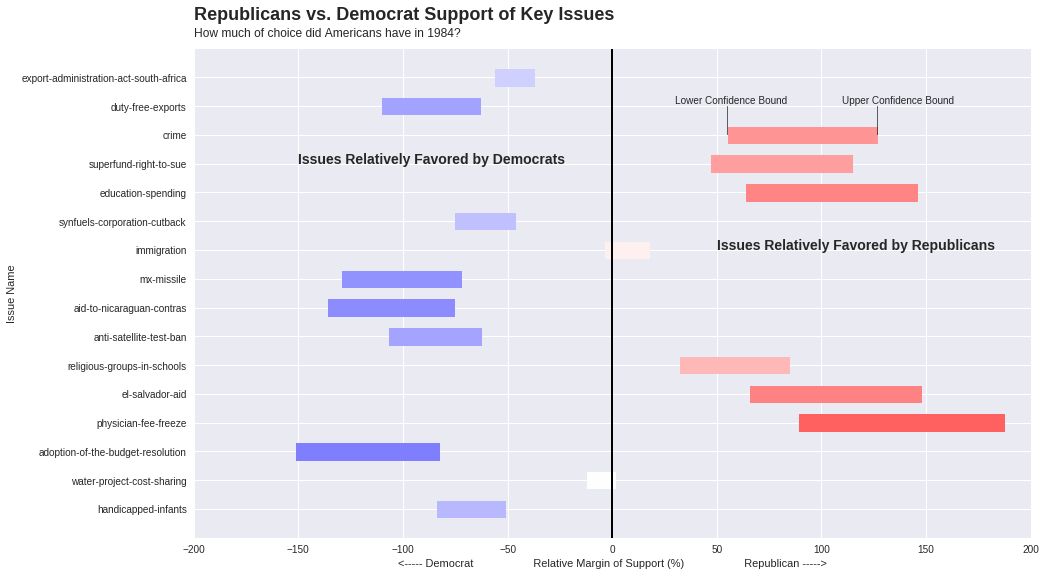

In [0]:
# experiment with box plot? or alts for visualizing

# coloring for issue support spectrum
import matplotlib
import matplotlib.pyplot as plt

cmap = plt.cm.bwr
norm = matplotlib.colors.Normalize(vmin=-150, vmax=150.0) # CALL THIS on a value to normalize it to a colormap

# initialize plot, set general size and labeling
fig, ax = plt.subplots(figsize=(15,9))

ax.set_xlim(-200, 200)
ax.set_ylim(0, 170)

ax.set_xlabel('<----- Democrat                    Relative Margin of Support (%)                    Republican ----->')
ax.set_ylabel('Issue Name')

ax.text(x=-200, 
        y=180, 
        s='Republicans vs. Democrat Support of Key Issues',
        fontsize=18,
        fontweight='bold')

ax.text(x=-200, 
        y=174, 
        s='How much of choice did Americans have in 1984?',
        fontsize=12)

ax.text(x=-150, 
        y=130, 
        s='Issues Relatively Favored by Democrats',
        fontsize=14,
        fontweight='bold')

ax.text(x=50, 
        y=100, 
        s='Issues Relatively Favored by Republicans',
        fontsize=14,
        fontweight='bold')

# confidence bound example labeling
ax.text(x=110, 
        y=151, 
        s='Upper Confidence Bound',
        fontsize=10)

ax.text(x=30, 
        y=151, 
        s='Lower Confidence Bound',
        fontsize=10)
ax.arrow(x=55.1,y=150,dx=0,dy=-10)
ax.arrow(x=126.9,y=150,dx=0,dy=-10)

# line at x for clearer distinction
ax.axvline(x=0.0, linewidth=2, color='black')

# label by issue
ax.set_yticks(range(10,170,10))
ax.set_yticklabels(names[1:])

y_cord = 7.5 # starting coordinate for rectangle plotting

# plot issue confidence intervals
for issue in issue_tests.keys():
  rec = plt.Rectangle((issue_tests[issue].low*100, y_cord),
                    issue_tests[issue].high*100,
                    5,  
                    fill=True,
                    color=cmap(norm(issue_tests[issue].mean*100)),
                    linewidth=3)
  ax.add_patch(rec) # add rectangle to the plot
  y_cord += 10 # jump up 10 for next box

plt.show()